In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants


In [3]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)

Белый шум

In [5]:
def gen_white_noise(length):
    return np.random.random(size = length)

white_noise = gen_white_noise(num_samples)

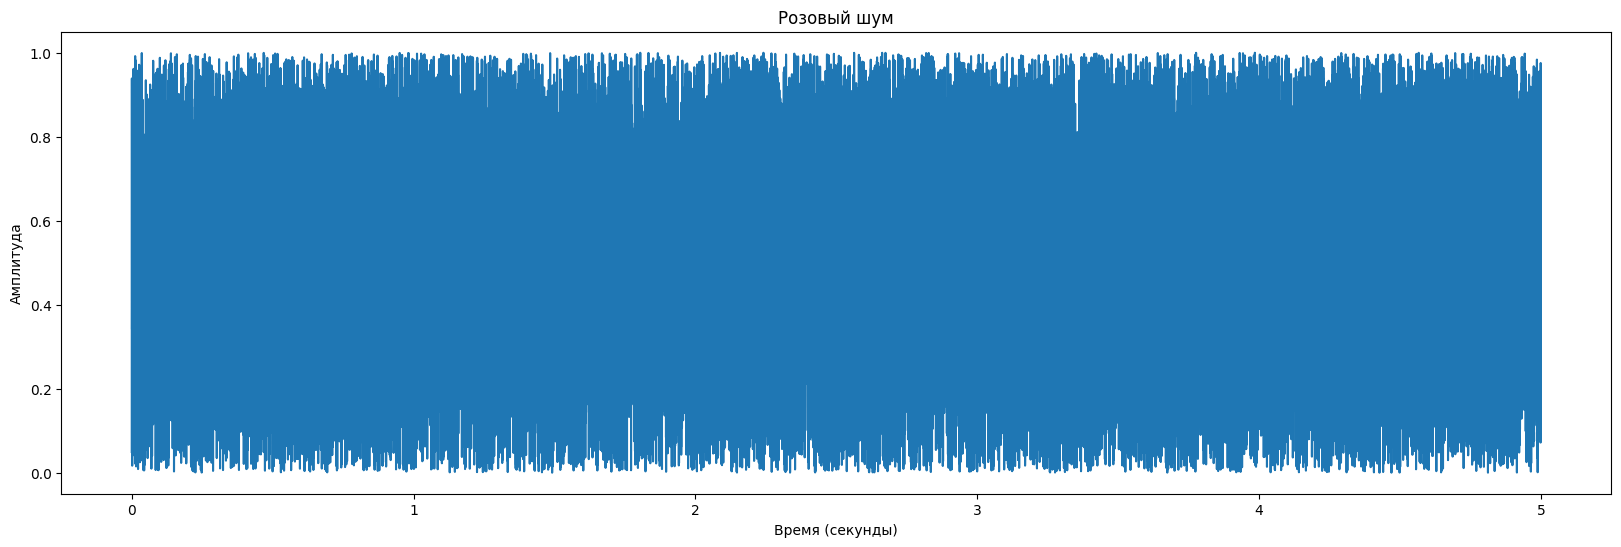

In [8]:
# отрисовываем, что получилось 
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

Розовый шум

In [9]:
def gen_pink_noise(length, scale = 1):
    white_noise = gen_white_noise(length)
    
    pink_ft = pink_ft = np.fft.rfft(white_noise) # Преобр. Фурье белого шума
    pink_ft = pink_ft/np.sqrt(np.arange(1,len(pink_ft)+1)) # Деление на частоты

    return np.fft.irfft(pink_ft) # обратное преобразование

pink_noise = gen_pink_noise(num_samples)

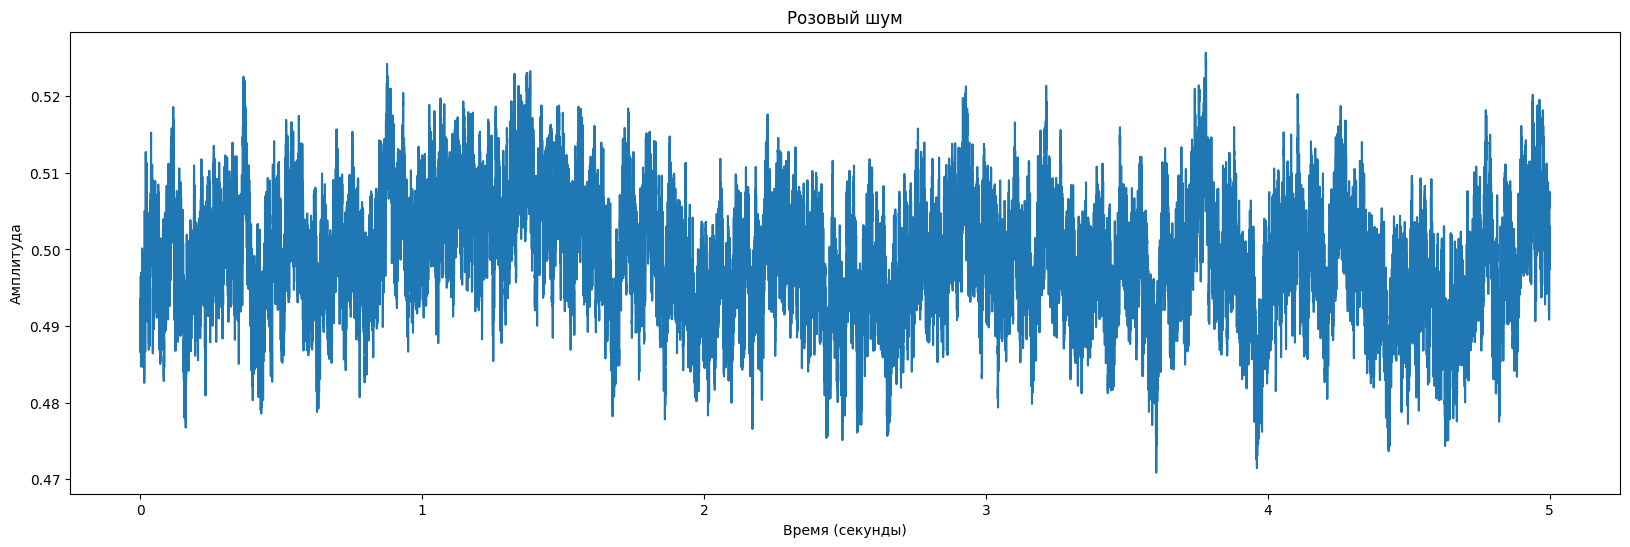

In [10]:
# отрисовываем, что получилось 
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

Черный шум

In [11]:

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось



black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]                              

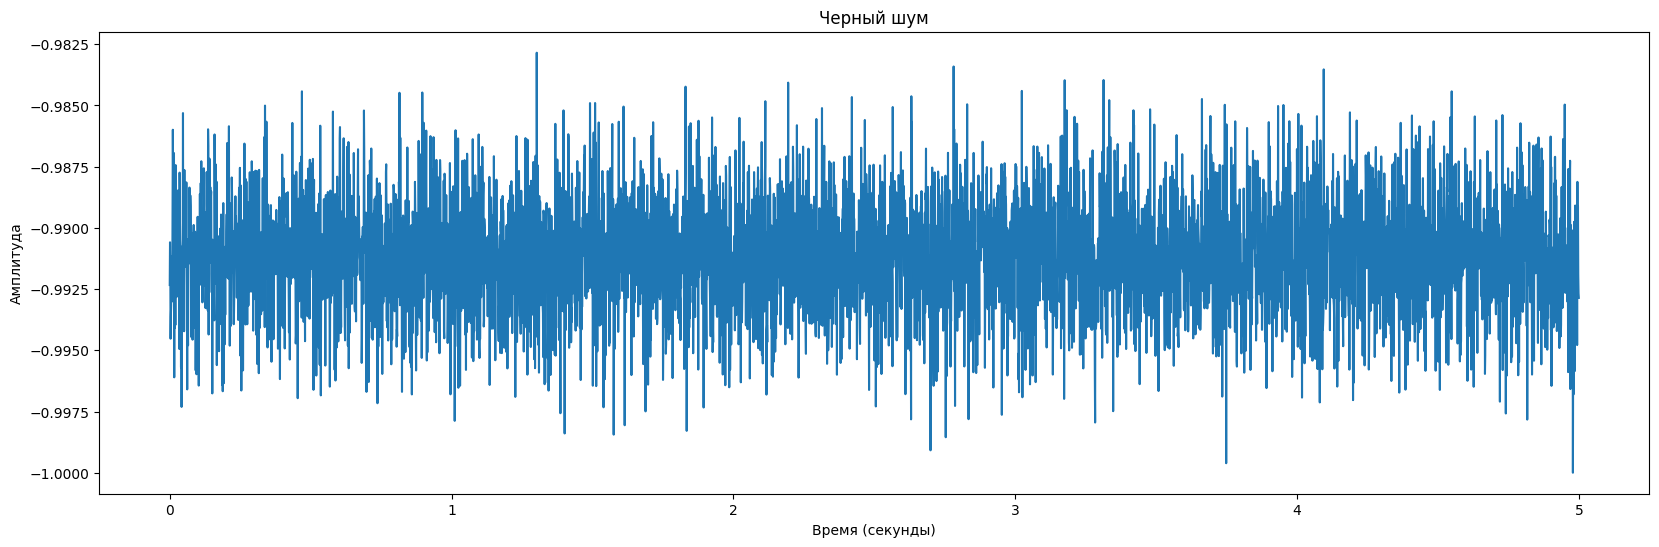

In [12]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

Зашумленный сигнал

In [13]:

time_points = np.linspace(0, duration, num_samples)  # Создаем равномерные временные точки от 0 до 5 секунд

white_noise_base = gen_white_noise(num_samples)

values = np.sin(time_points*np.pi)**3+np.cos(time_points*np.pi)**3 # вычисляем амплитуды сигнала по синусоидальному закону

values_noise = values + white_noise_base # зашумляем сигнал



C:\Users\k_dys\AppData\Local\Temp\ipykernel_8480\1049346919.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


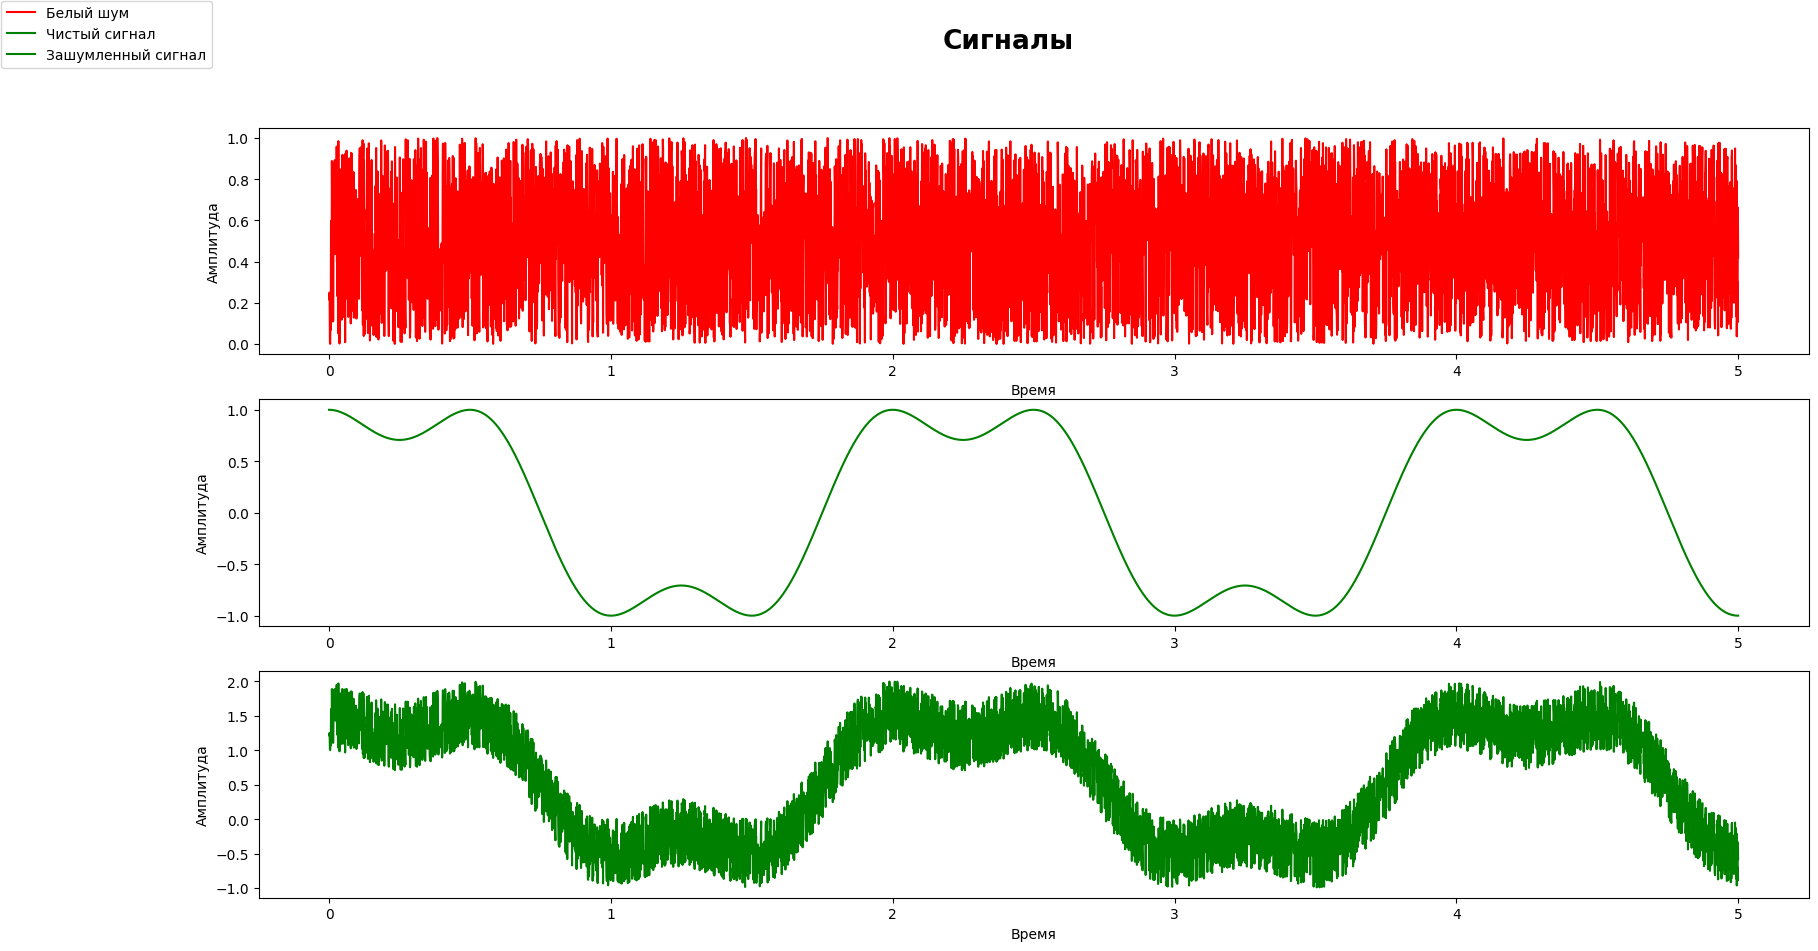

In [14]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["Белый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)

